In [1]:
import graphviz

import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid

from matplotlib import pyplot as plt

from tqdm import tqdm

from read_data import preprocess, ATTRIBUTES_NUMERICAL
from decision_tree import DecisionTree

from copy import deepcopy

from neural_network import NeuralNetwork
from neural_network import one_hot_encode

%load_ext autoreload
%autoreload 2

In [115]:
accuracy, nodes = [], []
depths = range(3, 30)
for d in depths:
    clf = DecisionTreeClassifier(criterion="entropy", max_depth=d, random_state=1)
    clf.fit(train_data[:, 1:], train_data[:, 0])
    accuracy.append(100 * clf.score(valid_data[:, 1:], valid_data[:, 0]))
    nodes.append(clf.tree_.node_count)

clf = DecisionTreeClassifier(criterion="entropy", max_depth = 12, min_samples_leaf = 10, min_samples_split = 60)
clf.fit(train_data[:, 1:], train_data[:, 0])
print(100 * clf.score(valid_data[:, 1:], valid_data[:, 0]))
print(clf.tree_.node_count)

print("Params", results[max(results)])
print("Accuracy", max(results))

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion='entropy', random_state=0)
clf.fit(train_data[:, 1:], train_data[:, 0])
clf.score(valid_data[:, 1:], valid_data[:, 0])

In [2]:
def read_rich_poor_data(binarize_median=True):
    return (
        preprocess("data/train.csv", binarize_median),
        preprocess("data/test.csv", binarize_median),
        preprocess("data/valid.csv", binarize_median),
    )

train_data, test_data, valid_data = read_rich_poor_data(binarize_median=True)

In [3]:
dtree = DecisionTree(train_data)

In [4]:
dtree2 = deepcopy(dtree)
nc, acc = dtree2.prune_brute(train_data, test_data, valid_data)

100%|#######################################| 7902/7902 [11:03<00:00, 11.90it/s]


In [5]:
from q1_dtree import save_plot

In [6]:
save_plot(nc, acc, "output/dtree_part_b_while_pruning", invert=True)

In [13]:
nc.reverse()

Text(0.5,0,'Number of nodes')

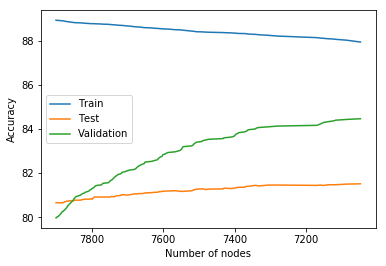

In [17]:
# plt.xlim(max(nc), min(nc))
plt.gca().invert_xaxis()

plt.plot(nc, acc["train"])
plt.plot(nc, acc["test"])
plt.plot(nc, acc["valid"])

plt.legend(['Train', 'Test', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Number of nodes')

# plt.savefig("Masti_After_Pruning.png")
# plt.close()


In [8]:
for attr in ATTRIBUTES_NUMERICAL:
    print(attr, dtree._multi_path_attrs(dtree.root, attr))


age [38.0, 46.0, 56.0, 57.0, 62.0, 64.0, 65.0]
fnlwgt [178615.0, 117681.0, 80665.5, 46729.0, 62176.0, 71770.0, 67248.5, 64922.0, 63577.0, 62898.5, 62485.0, 62346.0, 62374.0, 62385.0, 62438.0]
edun [9.0, 9.5, 11.5]
capg [7688.0]
capl [1207.5]
hpw [40.0]


In [65]:
print(dtree.score(train_data))
print(dtree.score(test_data))
print(dtree.score(valid_data))

98.3555555556
68.7571428571
68.8666666667


In [39]:
import pandas as pd
pd.DataFrame(train_data, columns=ATTRIBUTES)

,rich,age,wc,fnlwgt,edu,edun,mar,occ,rel,race,sex,capg,capl,hpw,nc
0,0,39,5,77516,0,13,2,8,3,0,1,2174,0,40,0
1,0,50,1,83311,0,13,0,4,2,0,1,0,0,13,0
2,0,38,0,215646,3,9,1,6,3,0,1,0,0,40,0
3,0,53,0,234721,2,7,0,6,2,4,1,0,0,40,0
4,0,28,0,338409,0,13,0,5,0,4,0,0,0,40,12
5,0,37,0,284582,10,14,0,4,0,0,0,0,0,40,0
6,0,49,0,160187,7,5,5,2,3,4,0,0,0,16,18
7,1,52,1,209642,3,9,0,4,2,0,1,0,0,45,0
8,1,31,0,45781,10,14,2,5,3,0,0,14084,0,50,0
9,1,42,0,159449,0,13,0,4,2,0,1,5178,0,40,0


In [24]:
for a in attributes:
    print(a, sorted(df[a].unique()))

rich [0, 1]
age [0, 1]
wc [0, 1, 2, 3, 4, 5, 6]
fnlwgt [0, 1]
edu [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
edun [0, 1]
mar [0, 1, 2, 3, 4, 5, 6]
occ [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
rel [0, 1, 2, 3, 4, 5]
race [0, 1, 2, 3, 4]
sex [0, 1]
capg [1]
capl [1]
hpw [0, 1]
nc [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]


In [33]:
dtree = DecisionTree(train_data)

In [123]:
# Test a tree with a single node
from decision_tree import Node
dtree = DecisionTree()
dtree.root = Node(None, 0)
dtree.score(train_data)

75.181481481481484

In [31]:
Y = np.array([0, 1, 0, 1, 0, 1, 1, 1, 1])

sum(np.bincount(Y))


9

In [42]:
node = dtree.root
node_err_rate = min(node.nsamples) / sum(node.nsamples)
# print(node_err_rate)

# children_err_rate = sum(
#     min(child.nsamples) / sum(node.nsamples)
#     for child in node.children.values()
# )
# print(children_err_rate)

print(node.nsamples)

for child in node.children.values():
    print(child.nsamples)

[20299  6701]
[629 628]
[3954   57]
[6063 5071]
[6202  733]
[769  28]
[2682  184]


In [2]:
# from sklearn.linear_model import LogisticRegression
# from visualization import plot_decision_boundary

toy_trainX = np.loadtxt("data/toy_trainX.csv", delimiter=",") 
toy_trainY = np.loadtxt("data/toy_trainY.csv", delimiter=",", dtype=int) 

toy_testX = np.loadtxt("data/toy_testX.csv", delimiter=",") 
toy_testY = np.loadtxt("data/toy_testY.csv", delimiter=",", dtype=int) 

In [ ]:
reduce(lambda)

In [29]:
nn = NeuralNetwork(topo=[2, 1, 1])

# nn.train(toy_trainX[:1], toy_trainY[:1], batch_size=0, epochs=5000, eta=3)

x = np.array([[ 2.51538821], [-1.74739283]])
y = 0

layer_outputs = nn.feed_forward(x, return_list=True)
dw, db = nn.back_propagation(layer_outputs, target=y)

dw
# db


NN Architecture:  2 - 1 - 1


[array([[-0.00840314,  0.0058375 ]]), array([[ 0.14365724]])]

In [360]:
nn = NeuralNetwork([2, 10, 1])
nn.train(toy_trainX, toy_trainY, batch_size=len(toy_trainX), epochs=5000, eta=0.1)

100%|██████████| 5500/5500 [01:06<00:00, 83.31it/s]


In [350]:
print(nn.weights)
print(nn.biases)

[array([[-2.46924832,  0.34987065],
       [ 0.81864005,  0.52453632],
       [-1.81485243,  1.83254844],
       [-1.95438044,  1.84755817],
       [-0.14592511,  2.54796978]]), array([[-0.94286757,  1.99722076,  1.50606934,  1.74414974, -2.17421309],
       [ 0.53467985, -0.41382447,  0.06832977, -1.72396453,  1.09775948]])]
[array([[ 0.38994903],
       [ 0.78797395],
       [-0.69269356],
       [-0.55351244],
       [ 0.40288983]]), array([[-1.12065162],
       [ 0.15625912]])]


In [362]:
# nn.score(toy_trainX, toy_trainY)
nn.score(toy_testX, toy_testY)

0.80000000000000004

In [364]:
from visualization import plot_decision_boundary
plot_decision_boundary(nn.predict, toy_trainX, toy_trainY, "Toy Training Data")

In [340]:
int(nn.feedforward(toy_trainX[0].reshape(-1, 1)) > 0.5)

0

In [145]:
x1 = toy_trainX[0].reshape(-1, 1)
y1 = one_hot_encode(toy_trainY[0], 2)

x2 = toy_trainX[1].reshape(-1, 1)
y2 = one_hot_encode(toy_trainY[1], 2)

gradients = [nn.backprop(x1, y1), nn.backprop(x2, y2)]
dw = sum(np.array(w) for w, _ in gradients)
db = sum(np.array(b) for _, b in gradients)
# list(sum(dw))
# print(list(dw))
dw

array([ array([[ 0.08180874, -0.05532883],
       [ 0.0114599 , -0.00615659],
       [ 0.00090234, -0.00083238],
       [-0.00719326,  0.00799595],
       [ 0.00073513, -0.00152081]]),
       array([[-0.06571705, -0.08781256, -0.09196902,  0.01914849, -0.11114813],
       [ 0.03573618,  0.05800522,  0.06016394, -0.00277861,  0.06259188]])], dtype=object)

In [111]:
nl = NielsenNetwork([2, 5, 2])
# nl.feedforward(x)
db, dw = nl.backprop(x, y)
dw

[array([[ 0.01061994, -0.00737747],
        [-0.00100052,  0.00069504],
        [ 0.00028567, -0.00019845],
        [ 0.00087554, -0.00060822],
        [-0.04537432,  0.03152069]]),
 array([[-0.06635723, -0.0005746 , -0.06788137, -0.06667333, -0.01927768],
        [ 0.14384585,  0.00124559,  0.14714978,  0.14453106,  0.04178918]])]

In [332]:
a = np.array([0.5])
int(a > 0.5)

0